In [ ]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [3]:
# Read the dataset
df = pd.read_csv(r"D:/End-to-end-Default-Risk-Pred-mlProject/notebook/data/default.csv", sep="\t")
df.head()

,credit_score,income,loan_amount,loan_term,interest_rate,debt_to_income_ratio,employment_years,savings_balance,age,default_risk_score
0,810,107410,11924,48,7.97,43.29,32,27181,58,7634.543366
1,418,37482,19291,24,6.94,11.01,33,15089,43,6249.833059
2,724,85641,39501,36,8.59,37.11,0,97459,33,2148.117990
3,444,73331,25714,36,13.09,33.39,18,2413,48,4979.385344
4,440,46723,35651,36,8.30,46.21,6,9716,42,2993.851950


In [5]:
# Dataset shape
print(df.shape)
print()
print(df.info())

(800, 10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   credit_score          800 non-null    int64  
 1   income                800 non-null    int64  
 2   loan_amount           800 non-null    int64  
 3   loan_term             800 non-null    int64  
 4   interest_rate         800 non-null    float64
 5   debt_to_income_ratio  800 non-null    float64
 6   employment_years      800 non-null    int64  
 7   savings_balance       800 non-null    int64  
 8   age                   800 non-null    int64  
 9   default_risk_score    800 non-null    float64
dtypes: float64(3), int64(7)
memory usage: 62.6 KB
None


In [6]:
# Check for null values
df.isnull().sum()

credit_score            0
income                  0
loan_amount             0
loan_term               0
interest_rate           0
debt_to_income_ratio    0
employment_years        0
savings_balance         0
age                     0
default_risk_score      0
dtype: int64

In [7]:
# Checking the measures of central tendency
df.describe().T

,count,mean,std,min,25%,50%,75%,max
credit_score,800.0,565.405000,159.528109,300.00000,426.750000,553.000000,702.000000,849.000000
income,800.0,85779.287500,37972.705711,20060.00000,53056.250000,85105.000000,118776.000000,149972.000000
loan_amount,800.0,27795.651250,12819.525021,5097.00000,16136.000000,28518.500000,38539.750000,49976.000000
loan_term,800.0,36.315000,17.163012,12.00000,24.000000,36.000000,48.000000,60.000000
interest_rate,800.0,8.732238,3.670453,2.51000,5.537500,8.725000,11.915000,14.990000
debt_to_income_ratio,800.0,29.812500,11.626346,10.00000,19.925000,29.645000,40.005000,49.910000
employment_years,800.0,16.376250,10.036339,0.00000,8.000000,16.000000,25.000000,34.000000
savings_balance,800.0,48850.921250,29785.455545,28.00000,21359.750000,47314.500000,76191.000000,99976.000000
age,800.0,42.443750,15.011446,18.00000,29.000000,42.000000,55.250000,69.000000
default_risk_score,800.0,4529.968687,2567.048232,49.75794,2377.592063,4379.666025,6821.026905,9113.843128


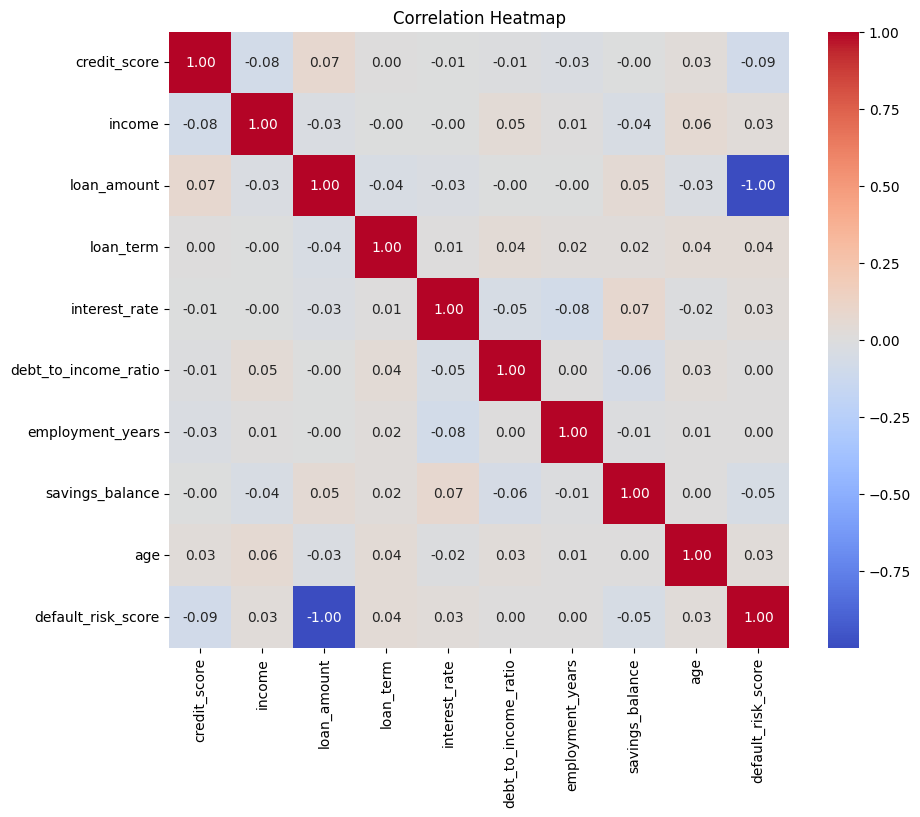

In [8]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# import missingno as msno
# df.plot(kind= "box");
# for col in df:
#     if df[col].dtype != 'O':
#         sns.countplot(x=col,data=df)
#         plt.show()

In [15]:
# For numerical data
for col in df.columns:
    # Create a histogram for numerical columns
    fig = px.histogram(
        df,
        x=col,
        title=f'Distribution of {col}',
        labels={col: col, 'count': 'Count'}
    )
            
     # Update layout for better readability
    fig.update_layout(
        xaxis_title=col,
        yaxis_title='Count',
        paper_bgcolor='rgba(0,0,0,0)',
        plot_bgcolor='rgba(0,0,0,0)',
        title_font=dict(size=18, family="Arial")
    )
            
    # Show the figure
    fig.show()        

In [16]:
df.columns

Index(['credit_score', 'income', 'loan_amount', 'loan_term', 'interest_rate',
       'debt_to_income_ratio', 'employment_years', 'savings_balance', 'age',
       'default_risk_score'],
      dtype='object')

In [ ]:
# How income level impact the default_risk_score
# Histogram plot on total score

fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='income',bins=20,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='income',kde=True,hue='default_risk_score')
plt.show()